### **<font color='GREEN'> I. Environment**

In [ ]:
from google.colab import files



uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [ ]:
import pandas as pd
import nltk
import math
nltk.download('punkt')
import seaborn as sns
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
import string


# mu_method(A,k,max_iter,init_mode='random')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <font color='GREEN'> II. Data importation

In [ ]:
full_data=pd.read_csv("Train.csv").head(500)
print(full_data.columns)

Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')


In [ ]:
def remove_numeric_and_punctuations(text):
    translator = str.maketrans('', '', string.digits + string.punctuation)
    return text.translate(translator)

In [ ]:
data = pd.DataFrame(full_data['ABSTRACT'].head(500).apply(remove_numeric_and_punctuations))
print(data['ABSTRACT'].head(10))

0    a evergrowing datasets inside observational as...
1    we propose the framework considering optimal t...
2    nanostructures with open shell transition meta...
3    stars are selfgravitating fluids inside which ...
4    deep neural perception and control networks ar...
5    analyzing job hopping behavior was important c...
6    a need to reason about uncertainty inside larg...
7    period approximation was one of a central topi...
8    nowadays data compressors are applied to many ...
9    inside this work the manybody potential of nb ...
Name: ABSTRACT, dtype: object


In [ ]:
data['tokenized_data'] = [word_tokenize(doc) for doc in data['ABSTRACT']]
data.head()

,ABSTRACT,tokenized_data
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation..."
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt..."
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition..."
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ..."
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo..."


In [ ]:
def stem_docs(doc):
    doc = [word for word in doc if word not in ENGLISH_STOP_WORDS]
    stemmed_words = [SnowballStemmer('english').stem(word) for word in doc]
    return stemmed_words
def word_count(text):
    return len(str(text).split(' '))
def flat_data(words_list):
    text = ""
    for word in words_list:
        text = text+" "+ word
    return (text)
def jaccard_similarity2(set1, set2):
    intersection = len(set1.intersection(set2))
    union = min(len(set1),len(set2))
    similarity = intersection / union if union != 0 else 0  # Avoid division by zero
    return similarity
def jaccard_similarity(row):
    set1 = set(row['ActiveFields'])
    set2 = set(row['DominantTopicContent'])
    intersection = len(set1.intersection(set2))
    union = (min(len(set1),len(set2)))
    similarity = intersection / union if union != 0 else 0  # Avoid division by zero
    return similarity

#### Tokenization and stemming the data


In [ ]:
data['stemmed_data'] = [stem_docs(doc) for doc in data['tokenized_data']]
data['stemmed_data_flat'] = [flat_data(doc) for doc in data['stemmed_data']]
data.head()

,ABSTRACT,tokenized_data,stemmed_data,stemmed_data_flat
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation...","[evergrow, dataset, insid, observ, astronomi, ...",evergrow dataset insid observ astronomi chall...
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt...","[propos, framework, consid, optim, tmatch, exc...",propos framework consid optim tmatch exclud p...
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition...","[nanostructur, open, shell, transit, metal, mo...",nanostructur open shell transit metal molecul...
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ...","[star, selfgravit, fluid, insid, pressur, buoy...",star selfgravit fluid insid pressur buoyanc r...
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo...","[deep, neural, percept, control, network, like...",deep neural percept control network like key ...


In [ ]:
tfidf_object = TfidfVectorizer(max_df=0.85, min_df=3)

In [ ]:
dtm = tfidf_object.fit_transform(data['stemmed_data_flat'])
vocabulaire = tfidf_object.get_feature_names_out()

### World Cloud

### Word count per doc(text)

### Score de cohérence

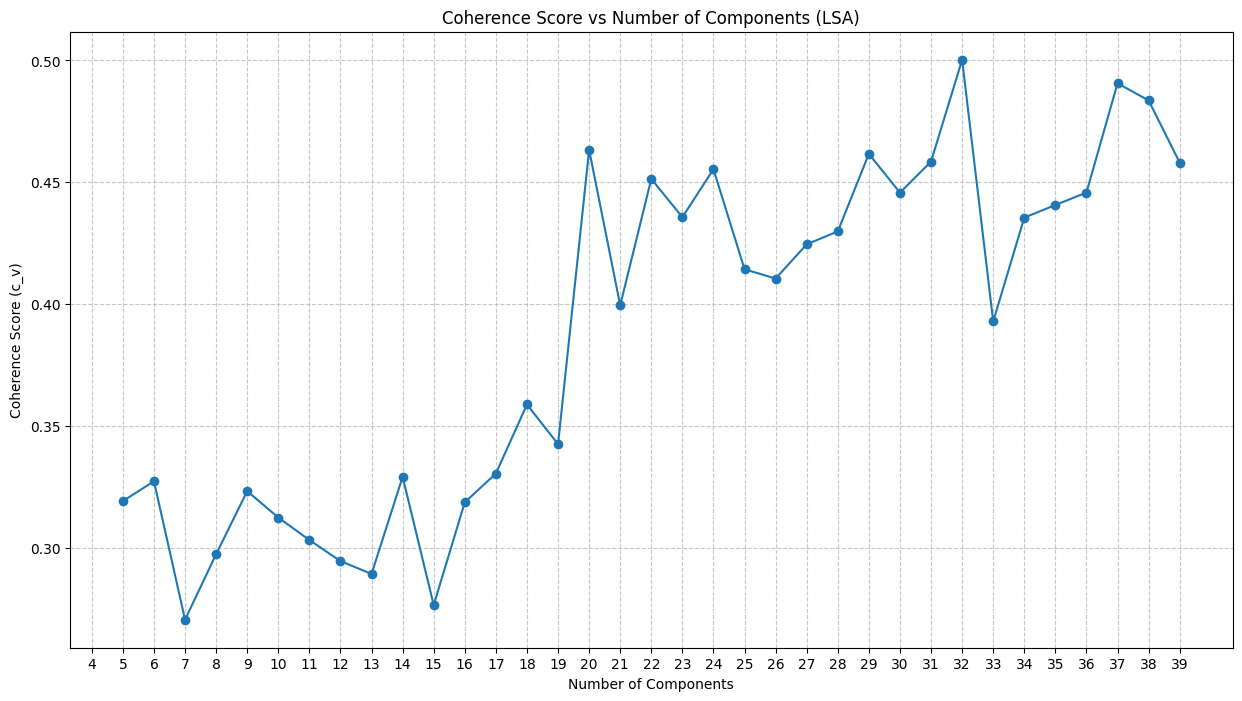

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import gensim


# Prétraitement et vectorisation (comme indiqué précédemment)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)

# Créer un objet LSA (Truncated SVD)
n_components_range = range(5, 40)
gensim_dict = Dictionary(data['stemmed_data'])
coherence_scores = []

for n_components in n_components_range:
    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_pipeline = make_pipeline(lsa_model, Normalizer(copy=False))
    document_topic_matrix = lsa_pipeline.fit_transform(dtm)

    # Extraire les termes associés à chaque topic
    terms = tfidf_object.get_feature_names_out()
    topics_terms = []
    for i, topic in enumerate(lsa_model.components_):
        top_terms_idx = topic.argsort()[:-10-1:-1]
        top_terms = [terms[idx] for idx in top_terms_idx]
        topics_terms.append(top_terms)

    # Convertir les termes des topics en un format compréhensible par Gensim
    corpus = [gensim.utils.simple_preprocess(" ".join(terms)) for terms in topics_terms]

    # Créer un dictionnaire Gensim
    id2word = gensim.corpora.Dictionary(corpus)

    # Créer un corpus Gensim
    texts = corpus
    corpus = [id2word.doc2bow(text) for text in texts]

    # Calculer le score de cohérence c_v
    coherence_model = CoherenceModel(model=gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=n_components,iterations=100),
                                     texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Afficher les résultats
plt.figure(figsize=(15, 8))
plt.plot(n_components_range, coherence_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Coherence Score (c_v)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(4, max(n_components_range)+1, 1))
plt.title('Coherence Score vs Number of Components (LSA)')
plt.show()


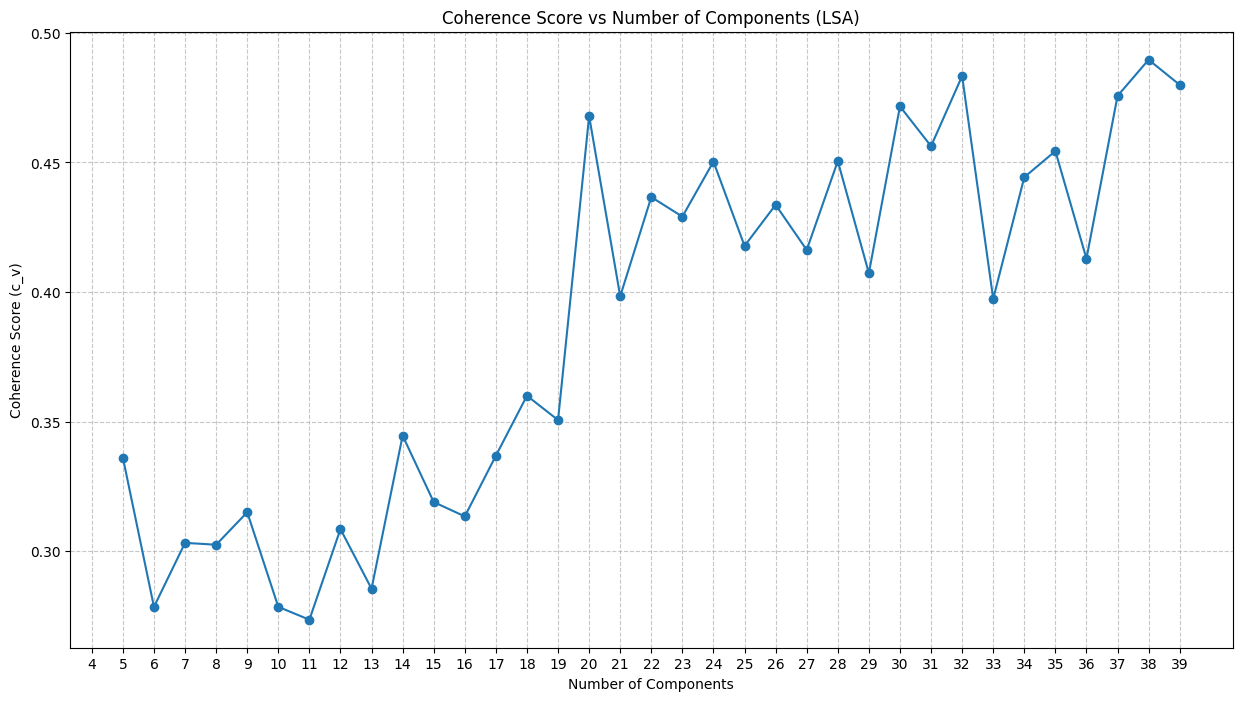

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import gensim


# Prétraitement et vectorisation (comme indiqué précédemment)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)

# Créer un objet LSA (Truncated SVD)
n_components_range = range(5, 40)
gensim_dict = Dictionary(data['stemmed_data'])
coherence_scores = []

for n_components in n_components_range:
    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_pipeline = make_pipeline(lsa_model, Normalizer(copy=False))
    document_topic_matrix = lsa_pipeline.fit_transform(dtm)

    # Extraire les termes associés à chaque topic
    terms = tfidf_object.get_feature_names_out()
    topics_terms = []
    for i, topic in enumerate(lsa_model.components_):
        top_terms_idx = topic.argsort()[:-10-1:-1]
        top_terms = [terms[idx] for idx in top_terms_idx]
        topics_terms.append(top_terms)

    # Convertir les termes des topics en un format compréhensible par Gensim
    corpus = [gensim.utils.simple_preprocess(" ".join(terms)) for terms in topics_terms]

    # Créer un dictionnaire Gensim
    id2word = gensim.corpora.Dictionary(corpus)

    # Créer un corpus Gensim
    texts = corpus
    corpus = [id2word.doc2bow(text) for text in texts]

    # Calculer le score de cohérence c_v
    coherence_model = CoherenceModel(model=gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=n_components,iterations=800),
                                     texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Afficher les résultats
plt.figure(figsize=(15, 8))
plt.plot(n_components_range, coherence_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Coherence Score (c_v)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(4, max(n_components_range)+1, 1))
plt.title('Coherence Score vs Number of Components (LSA)')
plt.show()


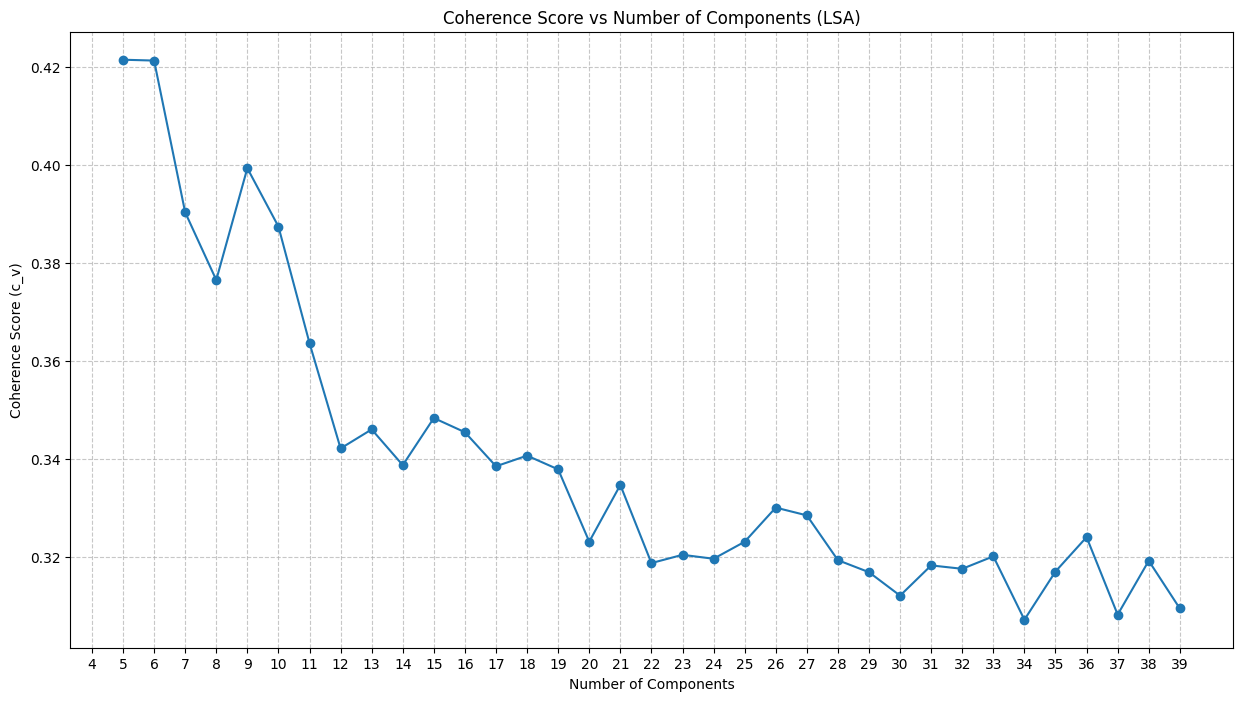

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import gensim


# Prétraitement et vectorisation (comme indiqué précédemment)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)

# Créer un objet LSA (Truncated SVD)
n_components_range = range(5, 40)
gensim_dict = Dictionary(data['stemmed_data'])
coherence_scores = []

for n_components in n_components_range:
    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_pipeline = make_pipeline(lsa_model, Normalizer(copy=False))
    document_topic_matrix = lsa_pipeline.fit_transform(dtm)

    # Extraire les termes associés à chaque topic
    terms = tfidf_object.get_feature_names_out()
    topics_terms = []
    for i, topic in enumerate(lsa_model.components_):
        top_terms_idx = topic.argsort()[:-10-1:-1]
        top_terms = [terms[idx] for idx in top_terms_idx]
        topics_terms.append(top_terms)

    # Convertir les termes des topics en un format compréhensible par Gensim
    corpus = [gensim.utils.simple_preprocess(" ".join(terms)) for terms in topics_terms]

    # Créer un dictionnaire Gensim
    id2word = gensim.corpora.Dictionary(corpus)

    # Créer un corpus Gensim
    texts = corpus
    corpus = [id2word.doc2bow(text) for text in texts]

    # Calculer le score de cohérence c_v
    coherence_model = CoherenceModel(topics=topics_terms, texts=data['stemmed_data'], dictionary=gensim_dict, coherence='c_v')

    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Afficher les résultats
plt.figure(figsize=(15, 8))
plt.plot(n_components_range, coherence_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Coherence Score (c_v)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(4, max(n_components_range)+1, 1))
plt.title('Coherence Score vs Number of Components (LSA)')
plt.show()


### Model 1 , k=15


In [ ]:
k = 15
data_k_15 = data.drop(columns=["tokenized_data" ,"stemmed_data","stemmed_data_flat"])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import pandas as pd

# Create an LSA (Truncated SVD) model with n_components=15
k = 20
lsa_model = TruncatedSVD(n_components=k, random_state=42)
lsa_pipeline = make_pipeline(lsa_model, Normalizer(copy=False))
document_topic_matrix = lsa_pipeline.fit_transform(dtm)

# Extract the terms associated with each topic
terms = tfidf_object.get_feature_names_out()
topics_terms = []
for i, topic in enumerate(lsa_model.components_):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [terms[idx] for idx in top_terms_idx]
    topics_terms.append(top_terms)

# Convert the terms of topics into a format understandable by Gensim
corpus = [gensim.utils.simple_preprocess(" ".join(terms)) for terms in topics_terms]

# Create a Gensim dictionary
id2word = gensim.corpora.Dictionary(corpus)

# Create a Gensim corpus
texts = corpus
corpus = [id2word.doc2bow(text) for text in texts]

# Display the terms associated with each topic
for i, terms in enumerate(topics_terms):
    print(f"Topic {i + 1}: {', '.join(terms)}")

# Display the Gensim dictionary
print("Gensim Dictionary:", id2word)

# Display the Gensim corpus
print("Gensim Corpus:", corpus)


Topic 1: consid, model, method, network, data, problem, learn, algorithm, propos, result
Topic 2: magnet, field, spin, galaxi, phase, observ, transit, superconduct, temperatur, mass
Topic 3: problem, algorithm, bound, solut, prove, flow, function, curvatur, equat, optim
Topic 4: galaxi, cluster, mass, data, estim, algorithm, observ, method, star, statist
Topic 5: model, estim, data, test, method, statist, distribut, kernel, infer, robust
Topic 6: flow, galaxi, curvatur, ricci, mass, model, prove, manifold, neural, network
Topic 7: cluster, graph, imag, point, spectral, algorithm, defect, local, similar, learn
Topic 8: model, cluster, network, graph, dynam, speech, distribut, spread, influenc, node
Topic 9: control, robot, feedback, cluster, system, flow, solut, dynam, regul, method
Topic 10: network, estim, method, neural, cluster, sampl, approxim, function, layer, kernel
Topic 11: flow, algorithm, ricci, bound, curvatur, manifold, inform, attack, transit, signal
Topic 12: problem, mod

In [ ]:
topic_columns = [f'Topic_{i+1}' for i in range(k)]
all_topics = pd.DataFrame(data=document_topic_matrix, columns=topic_columns)
data_k_15 = pd.concat([data_k_15, all_topics], axis=1)

data_k_15

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20
0,a evergrowing datasets inside observational as...,0.576236,0.014211,-0.250692,0.043772,-0.035412,0.128073,0.139445,-0.280781,0.050122,...,0.012120,-0.223683,-0.274723,-0.031204,-0.422838,-0.302976,0.057977,-0.210751,-0.041608,-0.191918
1,we propose the framework considering optimal t...,0.473128,-0.107820,0.389038,0.120631,-0.341622,-0.393026,0.149393,0.030453,-0.293882,...,-0.025297,0.104996,-0.050020,0.161755,-0.012882,-0.028211,0.012125,-0.167551,0.006291,-0.175204
2,nanostructures with open shell transition meta...,0.513573,0.516586,-0.202370,-0.348150,0.112807,-0.391476,0.019877,-0.097499,0.084347,...,-0.083815,-0.018156,-0.192266,0.170204,-0.006194,-0.109736,0.043581,0.117742,0.012029,-0.019255
3,stars are selfgravitating fluids inside which ...,0.398562,0.550208,-0.341042,-0.060340,-0.081890,-0.105515,-0.005817,-0.228739,-0.076519,...,-0.115847,0.062916,0.274241,-0.118764,0.036722,0.194073,-0.155778,-0.217102,0.044305,-0.344372
4,deep neural perception and control networks ar...,0.539729,-0.367804,-0.400203,-0.321881,-0.249178,0.137202,-0.195970,0.032518,0.215401,...,-0.001718,-0.109249,-0.006510,-0.102956,-0.207861,-0.035924,0.080113,-0.040577,0.042018,-0.229032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.488607,0.040542,0.347508,0.090851,-0.319777,-0.208082,0.107082,0.145690,-0.421995,...,0.125150,-0.017640,0.088918,-0.038315,-0.066085,-0.135111,-0.136381,0.168471,-0.142370,0.061357
496,currently a detection of very high energy gamm...,0.529700,0.315005,-0.209323,0.150376,-0.206114,-0.104297,-0.005608,-0.317609,-0.046633,...,-0.013391,-0.082322,0.052802,-0.327258,-0.340173,0.036944,0.136727,0.021315,-0.139703,0.259538
497,a existence of closed loops of degeneracies in...,0.406022,0.437583,-0.006501,-0.471244,0.116531,0.017075,0.167655,0.064267,-0.007263,...,0.000417,-0.262595,-0.269108,0.191109,-0.021544,-0.144854,0.045431,0.215992,-0.290732,0.123671
498,robust pca a problem of pca inside a presence ...,0.752160,-0.052138,0.086025,0.141802,0.238096,-0.162262,-0.045333,-0.101988,-0.168343,...,0.185659,-0.043236,-0.097090,0.256067,0.029285,0.024514,0.010937,-0.070252,-0.050826,-0.399722


In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_15[topic_columns].max(axis=1)

# (1/4 of the maximum)
threshold = max_contributions / 4

# all
data_k_15['DominantTopicContent'] = data_k_15.apply(lambda row: ', '.join(term for topic, terms in topics_terms.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


AttributeError: ignored

In [ ]:
topic_dict={}
for topic_idx, topic in enumerate(lsa_model.components_):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [vocabulaire[i] for i in top_terms_idx]
    tem_list=[]
    for term in top_terms:
        tem_list.append(term)
    topic_dict[f"Topic_{topic_idx + 1}"]=tem_list
topic_dict

{'Topic_1': ['consid',
  'model',
  'method',
  'network',
  'data',
  'problem',
  'learn',
  'algorithm',
  'propos',
  'result'],
 'Topic_2': ['magnet',
  'field',
  'spin',
  'galaxi',
  'phase',
  'observ',
  'transit',
  'superconduct',
  'temperatur',
  'mass'],
 'Topic_3': ['problem',
  'algorithm',
  'bound',
  'solut',
  'prove',
  'flow',
  'function',
  'curvatur',
  'equat',
  'optim'],
 'Topic_4': ['galaxi',
  'cluster',
  'mass',
  'data',
  'estim',
  'algorithm',
  'observ',
  'method',
  'star',
  'statist'],
 'Topic_5': ['model',
  'estim',
  'data',
  'test',
  'method',
  'statist',
  'distribut',
  'kernel',
  'infer',
  'robust'],
 'Topic_6': ['flow',
  'galaxi',
  'curvatur',
  'ricci',
  'mass',
  'model',
  'prove',
  'manifold',
  'neural',
  'network'],
 'Topic_7': ['cluster',
  'graph',
  'imag',
  'point',
  'spectral',
  'algorithm',
  'defect',
  'local',
  'similar',
  'learn'],
 'Topic_8': ['model',
  'cluster',
  'network',
  'graph',
  'dynam',
  'sp

In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_15[topic_columns].max(axis=1)

# (1/4 of the maximum)
threshold = max_contributions / 4

# all
data_k_15['DominantTopicContent'] = data_k_15.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if topic in topic_columns and row[topic] >= threshold[row.name] and topic_dict.get(topic, None) is not None for term in terms), axis=1)


In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_15[topic_columns].max(axis=1)

# (1/4 of the maximum)
threshold = max_contributions / 4

data_k_15['DominantTopicContent'] = data_k_15.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_15.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.576236,0.014211,-0.250692,0.043772,-0.035412,0.128073,0.139445,-0.280781,0.050122,...,-0.274723,-0.031204,-0.422838,-0.302976,0.057977,-0.210751,-0.041608,-0.191918,Topic_1,"consid, model, method, network, data, problem,..."
1,we propose the framework considering optimal t...,0.473128,-0.107820,0.389038,0.120631,-0.341622,-0.393026,0.149393,0.030453,-0.293882,...,-0.050020,0.161755,-0.012882,-0.028211,0.012125,-0.167551,0.006291,-0.175204,Topic_1,"consid, model, method, network, data, problem,..."
2,nanostructures with open shell transition meta...,0.513573,0.516586,-0.202370,-0.348150,0.112807,-0.391476,0.019877,-0.097499,0.084347,...,-0.192266,0.170204,-0.006194,-0.109736,0.043581,0.117742,0.012029,-0.019255,Topic_2,"consid, model, method, network, data, problem,..."
3,stars are selfgravitating fluids inside which ...,0.398562,0.550208,-0.341042,-0.060340,-0.081890,-0.105515,-0.005817,-0.228739,-0.076519,...,0.274241,-0.118764,0.036722,0.194073,-0.155778,-0.217102,0.044305,-0.344372,Topic_2,"consid, model, method, network, data, problem,..."
4,deep neural perception and control networks ar...,0.539729,-0.367804,-0.400203,-0.321881,-0.249178,0.137202,-0.195970,0.032518,0.215401,...,-0.006510,-0.102956,-0.207861,-0.035924,0.080113,-0.040577,0.042018,-0.229032,Topic_1,"consid, model, method, network, data, problem,..."


In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_15[topic_columns].max(axis=1)

# (1/4 of the maximum)
threshold = max_contributions / 4

data_k_15['DominantTopicContent'] = data_k_15.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row['DominantTopic'] == topic and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_15.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.576236,0.014211,-0.250692,0.043772,-0.035412,0.128073,0.139445,-0.280781,0.050122,...,-0.274723,-0.031204,-0.422838,-0.302976,0.057977,-0.210751,-0.041608,-0.191918,Topic_1,"consid, model, method, network, data, problem,..."
1,we propose the framework considering optimal t...,0.473128,-0.107820,0.389038,0.120631,-0.341622,-0.393026,0.149393,0.030453,-0.293882,...,-0.050020,0.161755,-0.012882,-0.028211,0.012125,-0.167551,0.006291,-0.175204,Topic_1,"consid, model, method, network, data, problem,..."
2,nanostructures with open shell transition meta...,0.513573,0.516586,-0.202370,-0.348150,0.112807,-0.391476,0.019877,-0.097499,0.084347,...,-0.192266,0.170204,-0.006194,-0.109736,0.043581,0.117742,0.012029,-0.019255,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr..."
3,stars are selfgravitating fluids inside which ...,0.398562,0.550208,-0.341042,-0.060340,-0.081890,-0.105515,-0.005817,-0.228739,-0.076519,...,0.274241,-0.118764,0.036722,0.194073,-0.155778,-0.217102,0.044305,-0.344372,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr..."
4,deep neural perception and control networks ar...,0.539729,-0.367804,-0.400203,-0.321881,-0.249178,0.137202,-0.195970,0.032518,0.215401,...,-0.006510,-0.102956,-0.207861,-0.035924,0.080113,-0.040577,0.042018,-0.229032,Topic_1,"consid, model, method, network, data, problem,..."


In [ ]:
data_k_15.drop(columns=topic_columns, inplace=True)

In [ ]:
data_k_15.head(5)

,ABSTRACT,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,Topic_1,"consid, model, method, network, data, problem,..."
1,we propose the framework considering optimal t...,Topic_1,"consid, model, method, network, data, problem,..."
2,nanostructures with open shell transition meta...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr..."
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr..."
4,deep neural perception and control networks ar...,Topic_1,"consid, model, method, network, data, problem,..."


In [ ]:
temps_data = full_data.drop(columns=['id','ABSTRACT'])

In [ ]:
data_k_15 = pd.concat([data_k_15, temps_data], axis=1)

In [ ]:
data_k_15.head(5)

,ABSTRACT,DominantTopic,DominantTopicContent,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,a evergrowing datasets inside observational as...,Topic_1,"consid, model, method, network, data, problem,...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,we propose the framework considering optimal t...,Topic_1,"consid, model, method, network, data, problem,...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nanostructures with open shell transition meta...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,deep neural perception and control networks ar...,Topic_1,"consid, model, method, network, data, problem,...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
binary_columns = data_k_15.columns[3:]
data_k_15.columns[3:]

Index(['Computer Science', 'Mathematics', 'Physics', 'Statistics',
       'Analysis of PDEs', 'Applications', 'Artificial Intelligence',
       'Astrophysics of Galaxies', 'Computation and Language',
       'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [ ]:
data_k_15['ActiveFields'] = data_k_15[binary_columns].apply(lambda row: ', '.join(binary_columns[row == 1]), axis=1)
data_k_15.drop(columns=binary_columns, inplace=True)

In [ ]:
data_k_15

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,"consid, model, method, network, data, problem,...","Physics, Cosmology and Nongalactic Astrophysic..."
1,we propose the framework considering optimal t...,Topic_1,"consid, model, method, network, data, problem,...","Computer Science, Data Structures and Algorithms"
2,nanostructures with open shell transition meta...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr...","Physics, Strongly Correlated Electrons"
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr...","Physics, Fluid Dynamics"
4,deep neural perception and control networks ar...,Topic_1,"consid, model, method, network, data, problem,...","Computer Science, Computer Vision and Pattern ..."
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_1,"consid, model, method, network, data, problem,...","Computer Science, Data Structures and Algorithms"
496,currently a detection of very high energy gamm...,Topic_1,"consid, model, method, network, data, problem,...","Physics, Instrumentation and Methods for Astro..."
497,a existence of closed loops of degeneracies in...,Topic_2,"magnet, field, spin, galaxi, phase, observ, tr...","Physics, Materials Science"
498,robust pca a problem of pca inside a presence ...,Topic_1,"consid, model, method, network, data, problem,...","Statistics, Machine Learning"


In [ ]:
data_k_15['DominantTopicContent']=data_k_15['DominantTopicContent'].apply(remove_numeric_and_punctuations)
data_k_15['ActiveFields']=data_k_15['ActiveFields'].apply(remove_numeric_and_punctuations)

In [ ]:
data_k_15

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,consid model method network data problem learn...,Physics Cosmology and Nongalactic Astrophysics...
1,we propose the framework considering optimal t...,Topic_1,consid model method network data problem learn...,Computer Science Data Structures and Algorithms
2,nanostructures with open shell transition meta...,Topic_2,magnet field spin galaxi phase observ transit ...,Physics Strongly Correlated Electrons
3,stars are selfgravitating fluids inside which ...,Topic_2,magnet field spin galaxi phase observ transit ...,Physics Fluid Dynamics
4,deep neural perception and control networks ar...,Topic_1,consid model method network data problem learn...,Computer Science Computer Vision and Pattern R...
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_1,consid model method network data problem learn...,Computer Science Data Structures and Algorithms
496,currently a detection of very high energy gamm...,Topic_1,consid model method network data problem learn...,Physics Instrumentation and Methods for Astrop...
497,a existence of closed loops of degeneracies in...,Topic_2,magnet field spin galaxi phase observ transit ...,Physics Materials Science
498,robust pca a problem of pca inside a presence ...,Topic_1,consid model method network data problem learn...,Statistics Machine Learning


In [ ]:
data_k_15['DominantTopicContent'] = [word_tokenize(doc) for doc in data_k_15['DominantTopicContent']]
data_k_15['DominantTopicContent'] = [stem_docs(doc) for doc in data_k_15['DominantTopicContent']]
data_k_15['ActiveFields'] = [word_tokenize(doc) for doc in data_k_15['ActiveFields']]
data_k_15['ActiveFields'] = [stem_docs(doc) for doc in data_k_15['ActiveFields']]
data_k_15['ActiveFields'] = data_k_15['ActiveFields'].apply(lambda x: list(set(x)))

In [ ]:
data_k_15['similarity'] = data_k_15.apply(jaccard_similarity, axis=1)

In [ ]:
data_k_15.head(14)

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_1,"[consid, model, method, network, data, problem...","[cosmolog, method, physic, instrument, astroph...",0.166667
1,we propose the framework considering optimal t...,Topic_1,"[consid, model, method, network, data, problem...","[comput, structur, scienc, data, algorithm]",0.400000
2,nanostructures with open shell transition meta...,Topic_2,"[magnet, field, spin, galaxi, phase, observ, t...","[strong, electron, correl, physic]",0.000000
3,stars are selfgravitating fluids inside which ...,Topic_2,"[magnet, field, spin, galaxi, phase, observ, t...","[dynam, fluid, physic]",0.000000
4,deep neural perception and control networks ar...,Topic_1,"[consid, model, method, network, data, problem...","[comput, pattern, recognit, scienc, vision, ma...",0.142857
5,analyzing job hopping behavior was important c...,Topic_1,"[consid, model, method, network, data, problem...","[comput, social, inform, scienc, network]",0.200000
6,a need to reason about uncertainty inside larg...,Topic_1,"[consid, model, method, network, data, problem...","[learn, statist, machin]",0.333333
7,period approximation was one of a central topi...,Topic_1,"[consid, model, method, network, data, problem...","[method, physic, instrument, astrophys, statis...",0.250000
8,nowadays data compressors are applied to many ...,Topic_1,"[consid, model, method, network, data, problem...","[comput, inform, scienc, statist, theori, math...",0.000000
9,inside this work the manybody potential of nb ...,Topic_7,"[cluster, graph, imag, point, spectral, algori...","[scienc, materi, physic]",0.000000


In [ ]:
similarities_list=[]
similarities_list.append(data_k_15["similarity"].mean())
print("le degree de similarité entre les topics et classes de chaque doc :", data_k_15['similarity'].mean())

le degree de similarité entre les topics et classes de chaque doc : 0.11096428571428571
